In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('youtube_statistics.xlsx')
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


# Descriptive Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [5]:
df.isna().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

In [6]:
df.duplicated().sum()

4229

* Trending date tidak sesuai tipe datanya (ubah ke tipe data datetime atau drop ) <br>
* terdapat missing value pada kolom description sejumlah 45 baris (ketika data preprocessing drop null values) <br>
* Terdapat duplicate pada dataset ini sebanyak 4229 baris (perlu dilakukan drop duplicate ketika data preparation)

### Pengelompokan Data

In [16]:
cats = ['trending_date','title','channel_title','publish_time','tags','comments_disabled','ratings_disabled','video_error_or_removed',
       'description','publish_date']
nums = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']
timestamp = ['trending_date', 'publish_time', 'publish_date']

In [8]:
df[nums].describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,21.552173,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,6.586716,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,23.000000,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,24.000000,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,24.000000,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


In [9]:
df[cats].describe()

,trending_date,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date
count,36791,36791,36791,36791,36791,36791,36791,36791,36746,36791
unique,205,16431,1390,12375,12463,2,2,2,13979,219
top,2017-12-23,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,04:30:00,[none],False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,2018-05-17 00:00:00
freq,199,19,284,333,1120,35611,36034,36780,166,318
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-27 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-13 00:00:00


In [17]:
# assign the numerical data into nums object
numerics = [ 'int64', 'float64']
display(df.select_dtypes(include=numerics).columns)
print(df.select_dtypes(include=numerics).shape)
data_num = df.select_dtypes(include=numerics)
data_num.head(3)

Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'No_tags',
       'desc_len', 'len_title'],
      dtype='object')

(36791, 8)


,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
0,1,1096327,33966,798,882,15,920,81
1,25,590101,735,904,0,19,2232,58
2,24,473988,2011,243,149,14,482,58


In [18]:
# assign the categorical data into cats object
display(df.select_dtypes(include=['object']).columns)
print(df.select_dtypes(include=object).shape)
data_cat = df.select_dtypes(include=['object'])
data_cat.head(3)

Index(['trending_date', 'title', 'channel_title', 'publish_time', 'tags',
       'description'],
      dtype='object')

(36791, 6)


,trending_date,title,channel_title,publish_time,tags,description
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",Presenting Sharry Mann latest Punjabi Song Cu...
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...","पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,Watch Stylish Star Allu Arjun @ ChaySam Weddin...


# Univariate Analysis

### Numerikal

### Boxplot

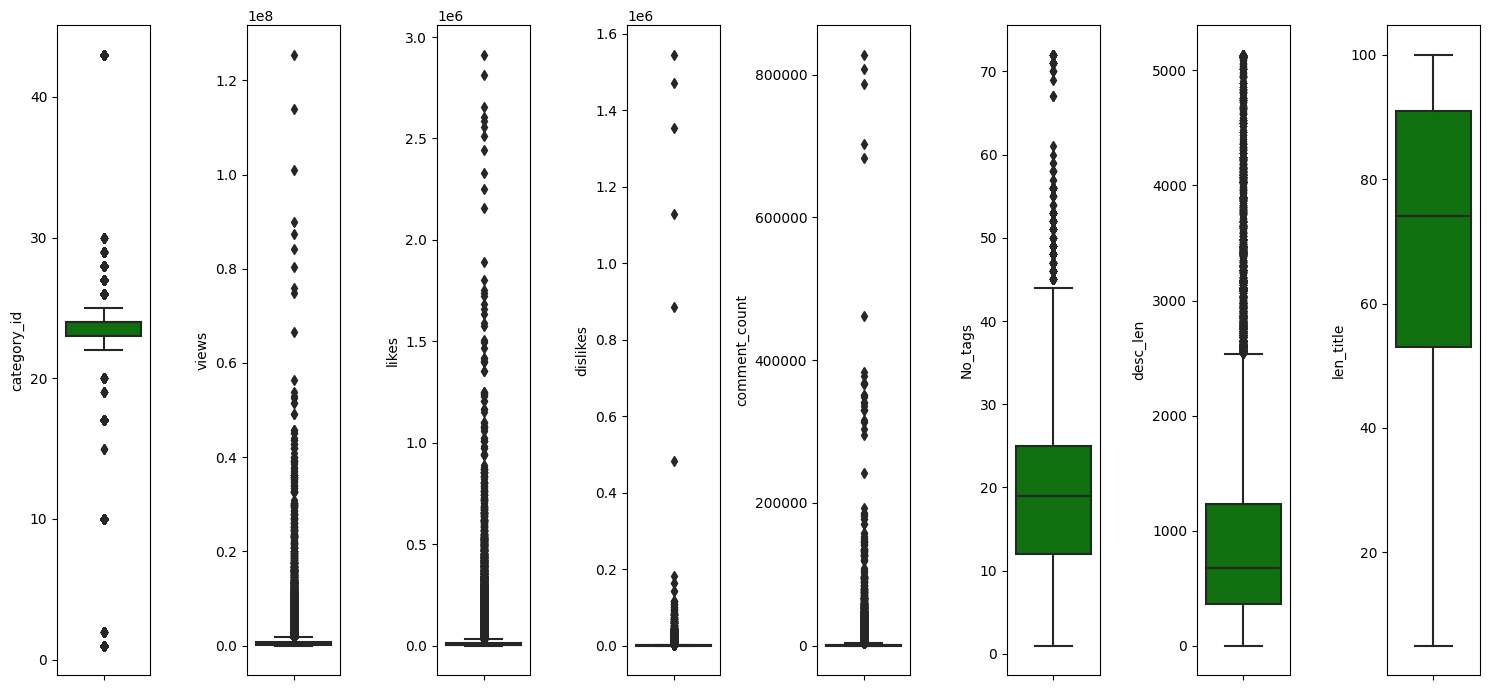

In [12]:
features = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df[features[i]],color='green',orient='v')
    plt.tight_layout();

### Density Graph

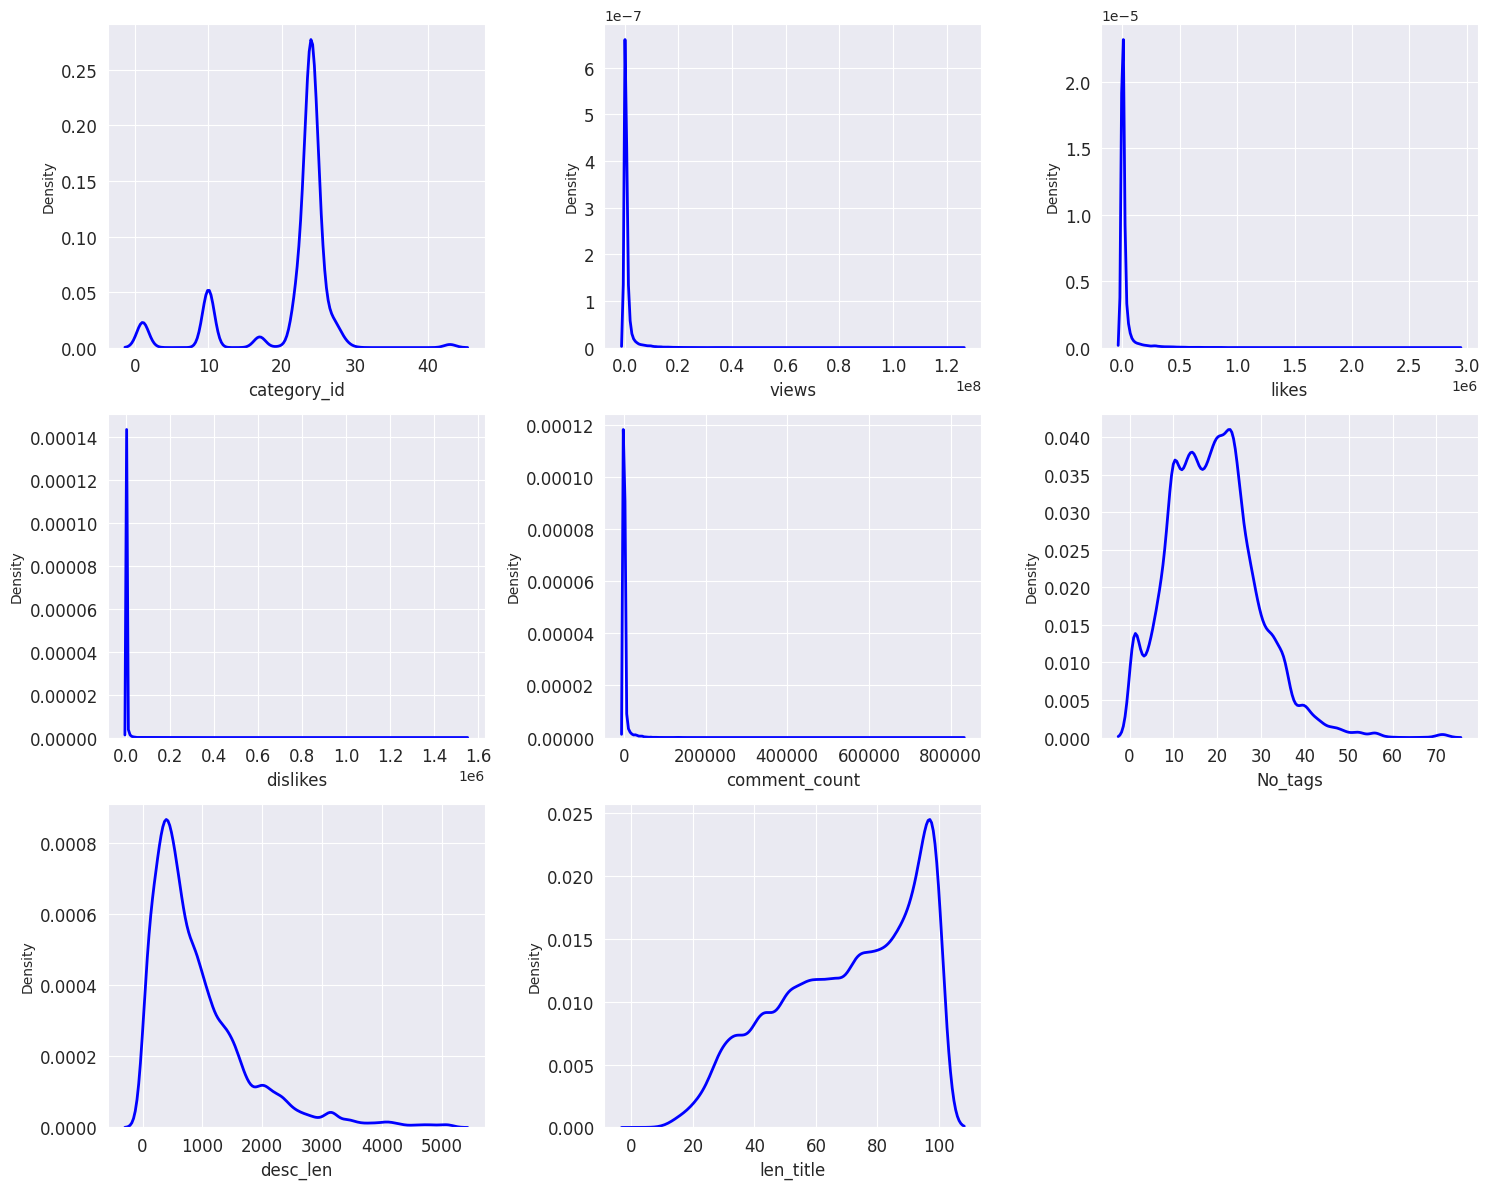

In [13]:
import math

sns.set_style('darkgrid')
fig = plt.figure(figsize=(15, 12))
for i in range(len(nums)):
    sns.kdeplot(df[nums[i]], ax = fig.add_subplot(math.ceil(len(nums)/3),3, i+1), color = 'blue', linewidth = 2)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlabel = nums[i], fontsize=12)
    plt.tight_layout()

* Semua kolom pada data numerikal terdapat outliers kecuali pada kolom `len_title` <br>
* pada kolom : <br>
    - category_id: Kolom ini memiliki nilai rata-rata sekitar 21.55, dengan rentang nilai antara 1 dan 43. Nilai paling sering muncul (mode) adalah 24. mean lebih besar dari median. `multi modal`. **positively skewed**
    - views: Rata-rata jumlah views sekitar 1,071,490. Jumlah views paling rendah adalah 4,024 dan paling tinggi adalah 125,432,200. Mean lebih besar dari median, mungkin terdapat beberapa video dengan views yang sangat tinggi. **positively skewed**
    - likes: Rata-rata jumlah likes sekitar 27,450. Jumlah likes paling rendah adalah 0 dan paling tinggi adalah 2,912,710. Mean lebih besar dari median, mungkin terdapat beberapa video dengan likes yang sangat tinggi. **postively skewed**
    - dislikes: Rata-rata jumlah dislikes sekitar 1,685. Jumlah dislikes paling rendah adalah 0 dan paling tinggi adalah 1,545,017. Mean lebih besar dari median, mungkin terdapat beberapa video dengan dislikes yang sangat tinggi. **postively skewed**
    - comment_count: Rata-rata jumlah komentar sekitar 2,714. Jumlah komentar paling rendah adalah 0 dan paling tinggi adalah 827,755. Mean lebih besar dari median, mungkin terdapat beberapa video dengan komentar yang sangat banyak. **positively skewed**
    - No_tags: Rata-rata jumlah tags sekitar 19. Jumlah tags paling rendah adalah 1 dan paling tinggi adalah 72. hampir mendekati normal karna selisih antara mean dan median kecil. `multi modal`
    - desc_len: Rata-rata panjang deskripsi sekitar 923 kata. Panjang deskripsi paling rendah adalah 3 kata dan paling tinggi adalah 5,136 kata.  mean lebih besar dari median **positively skewed**
    - len_title: Rata-rata panjang judul sekitar 70 karakter dengan. Panjang judul paling rendah adalah 5 karakter dan paling tinggi adalah 100 karakter. mean lebih kecil dari median **negatively skewed**. `multi modal`

* Untuk handling kolom kolom yang berdistribusi positively skewed dan multi modal kami mempertimbangkan penggunaan log transformasi ketika data preprocessing dan negatively skewed dengan standardized transformasi
* Untuk handling kolom-kolom outlier kami mempertimbangkan penggunaan Z-score ketika data preprocessing

### Kategorikal

In [14]:
data_cat_unique = data_cat.nunique().reset_index()
data_cat_unique.columns = ['fitur', 'nilai_unik']
data_cat_unique = data_cat_unique.sort_values('nilai_unik', ascending=False)
data_cat_unique

,fitur,nilai_unik
1,title,16431
5,description,13979
4,tags,12463
3,publish_time,12375
2,channel_title,1390
0,trending_date,205


In [15]:
df[cats].describe()

,trending_date,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date
count,36791,36791,36791,36791,36791,36791,36791,36791,36746,36791
unique,205,16431,1390,12375,12463,2,2,2,13979,219
top,2017-12-23,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,04:30:00,[none],False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,2018-05-17 00:00:00
freq,199,19,284,333,1120,35611,36034,36780,166,318
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-27 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-13 00:00:00


### Timestamp

In [16]:
for time in timestamp:
  print('Category: ', time)
  display((df[time].value_counts() / len(time) * 100)[:10])
  print()

Category:  trending_date


2017-12-23    1530.769231
2017-12-22    1523.076923
2018-04-15    1523.076923
2018-05-05    1523.076923
2017-12-16    1515.384615
2017-12-13    1515.384615
2018-01-25    1515.384615
2018-01-20    1507.692308
2017-12-12    1507.692308
2018-03-03    1507.692308
Name: trending_date, dtype: float64


Category:  publish_time


04:30:00    2775.000000
04:30:01    1333.333333
16:30:00    1266.666667
11:30:01    1241.666667
12:30:01    1175.000000
16:30:01    1150.000000
12:30:00    1050.000000
14:30:01    1050.000000
14:30:00    1050.000000
05:30:00     916.666667
Name: publish_time, dtype: float64


Category:  publish_date


2018-05-17    2650.000000
2018-02-03    2641.666667
2018-01-29    2516.666667
2018-05-13    2383.333333
2018-05-04    2166.666667
2018-01-12    2158.333333
2018-02-16    2150.000000
2017-12-20    2150.000000
2018-01-26    2133.333333
2018-01-27    2075.000000
Name: publish_date, dtype: float64

In [17]:
df[timestamp].describe()

,trending_date,publish_time,publish_date
count,36791,36791,36791
unique,205,12375,219
top,2017-12-23,04:30:00,2018-05-17 00:00:00
freq,199,333,318
first,NaN,NaN,2017-05-27 00:00:00
last,NaN,NaN,2018-06-13 00:00:00


* Kolom trending_date memiliki 205 nilai unik, yang berarti ada 205 hari berbeda di mana video menjadi trending.
Hari paling banyak video menjadi trending adalah 23 Desember 2017, dengan 199 video menjadi trending pada hari itu
* Kolom publish_time memiliki 12375 nilai unik, yang berarti ada 12375 waktu yang berbeda di mana video dipublikasikan.
Waktu paling banyak video menjadi trending adalah 4:30 AM, dengan 333 video menjadi trending pada waktu itu.
* Kolom publish_date memiliki 219 nilai unik, yang berarti ada 219 hari yang berbeda di mana video dipublikasika
Tanggal paling banyak video dipublikasikan adalah 17 Mei 2018, dengan 318 video dipublikasikan pada hari itu.
* Video pertama yang dipublikasikan adalah pada 27 Mei 2017, dan video terakhir yang dipublikasikan adalah pada 13 Juni 2018.

Summary :
* Video paling banyak menjadi trending di akhir tahun, mungkin karena orang-orang lebih banyak menghabiskan waktu di internet saat libur Natal dan Tahun Baru.
* Video paling banyak menjadi trending di pagi hari, mungkin karena orang-orang lebih banyak menonton video di pagi hari sebelum memulai aktivitas mereka.
* Video paling banyak dipublikasikan pada bulan Mei, mungkin karena ini adalah bulan yang banyak orang merayakan hari libur.
* Video pertama yang dipublikasikan adalah pada bulan Mei, dan video terakhir yang dipublikasikan adalah pada bulan Juni, yang berarti data ini mencakup periode waktu satu tahun.

# Multivariate

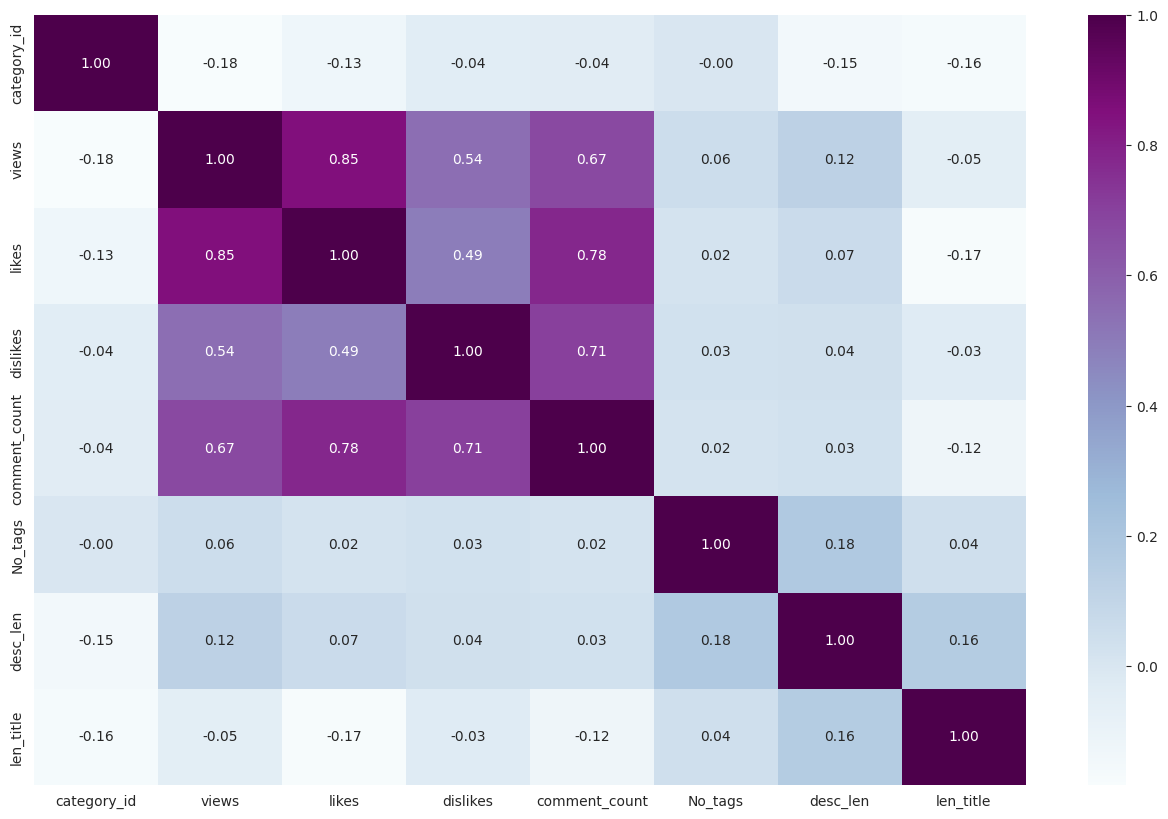

In [18]:
features = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']
corr_= df[features].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu");

* Kolom likes memiliki nilai korelasi positif yang tinggi dengan kolom views yakni 0.85, kolom ini cenderung redundan dikarenakan nilanya lebih besar dari 0.75. Dengan asumsi bahwa kolom likes dan views saling berkorelasi positif, maka kita dapat menyimpulkan bahwa video yang disukai cenderung memiliki lebih banyak views daripada video yang tidak disukai.
* Kolom dislikes memiliki nilai korelasi positif yang tinggi dengan kolom views yakni 0.54. Dengan asumsi bahwa kolom dislikes dan views saling berkorelasi positif, maka kita dapat menyimpulkan bahwa video yang tidak disukai cenderung memiliki lebih sedikit views daripada video yang tidak disukai.
* Kolom comment_count memiliki nilai korelasi positif yang tinggi dengan kolom views yakni 0.67. Dengan asumsi bahwa kolom comment_count dan views saling berkorelasi positif, maka kita dapat menyimpulkan bahwa video yang memiliki banyak komentar cenderung memiliki lebih banyak views daripada video yang tidak memiliki banyak komentar.
* Kolom desc_len memiliki nilai korelasi positif yang cukup tinggi dengan kolom views yakni 0.12. Dengan asumsi bahwa kolom desc_len dan views saling berkorelasi positif, maka kita dapat menyimpulkan bahwa video yang memiliki deskripsi yang panjang cenderung memiliki lebih banyak views daripada video yang memiliki deskripsi yang pendek.
* Kolom category_id memiliki nilai korelasi negatif yang cukup tinggi yakni -0.18. Dengan asumsi bahwa kolom category_id dan views saling berkorelasi negatif, maka kita dapat menyimpulkan bahwa video yang berada dalam kategori tertentu cenderung memiliki lebih sedikit views daripada video yang berada dalam kategori lain.

Summary

* Kolom likes, dislikes, comment_count baru muncul ketika video sudah dipublish atau muncul bersamaan dengan kolom views sehingga kolom-kolom diatas lebih cocok digunakan untuk memprediksi apakah suatu video akan memiliki peluang lebih besar untuk menjadi trending atau tidak.
* Kolom category_id bisa digunakan untuk memprediksi jumlah views suatu video. dengan asumsi jika suatu video berada dalam kategori tertentu yang populer, maka kita dapat memprediksi bahwa video tersebut akan memiliki jumlah views yang lebih banyak daripada video yang berada dalam kategori lain.

<Figure size 1500x1500 with 0 Axes>

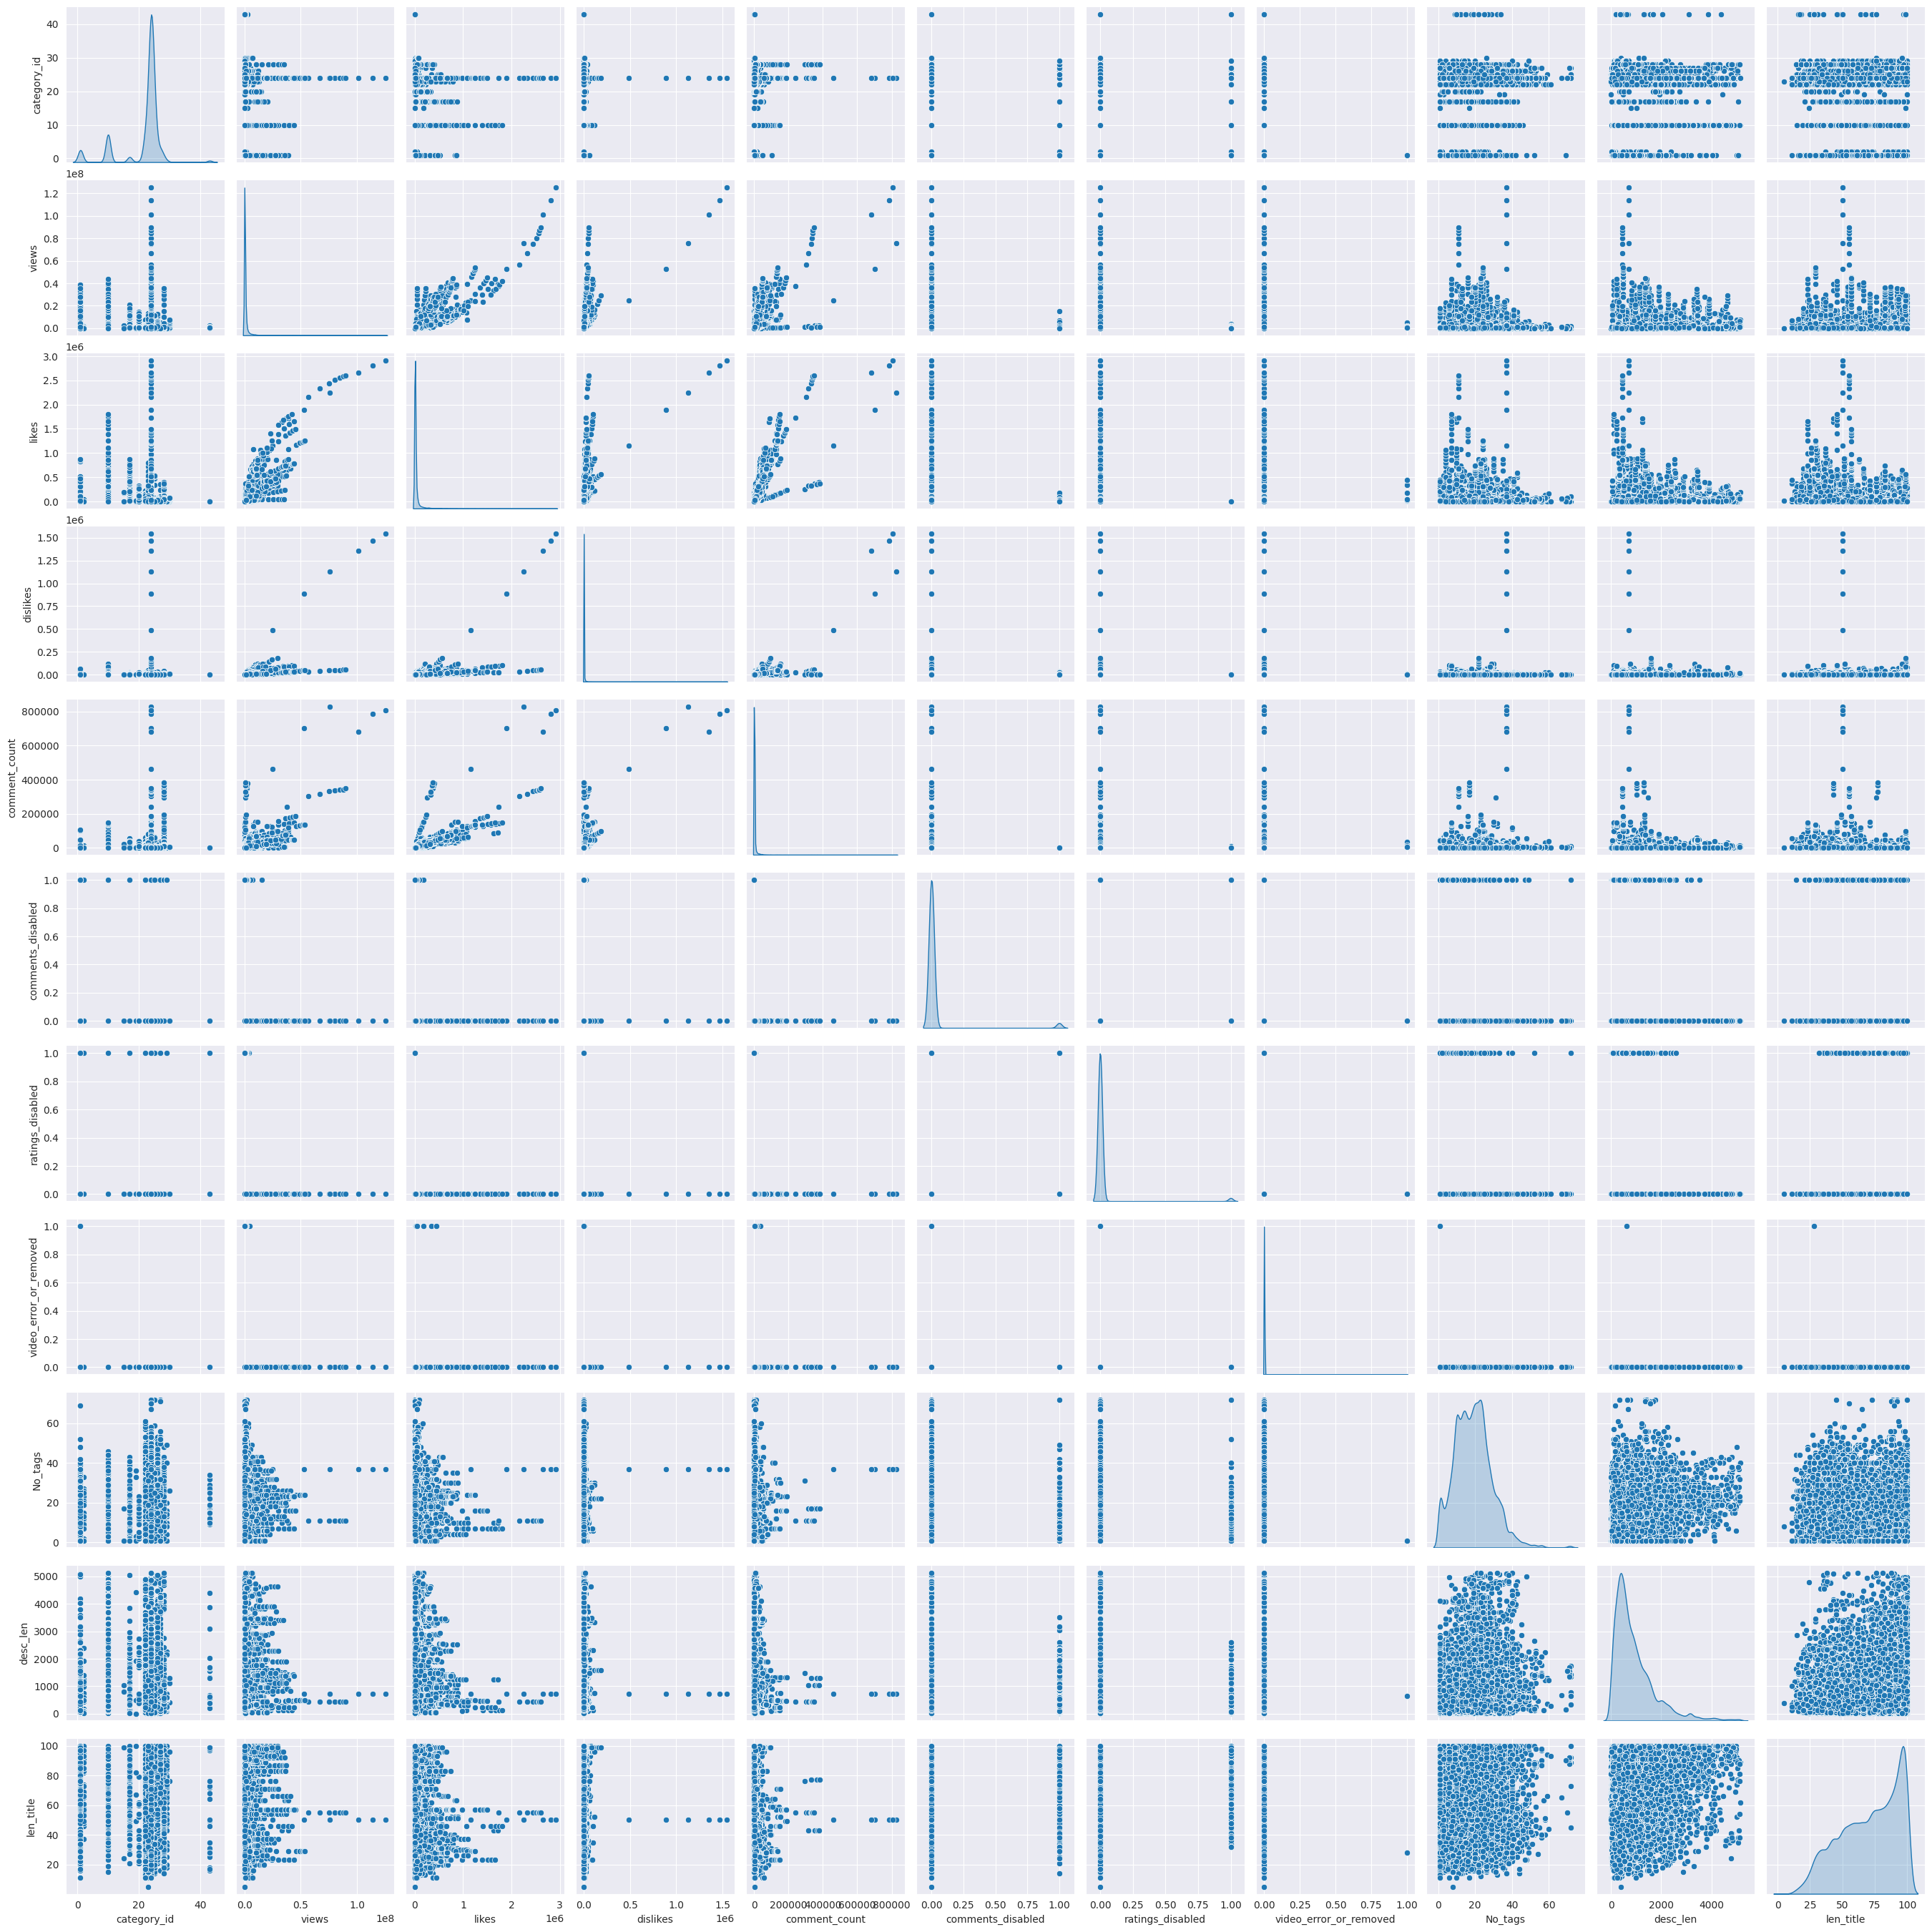

In [18]:
fig = plt.figure(figsize = (15, 15))
sns.pairplot(df, diag_kind = 'kde')

<Figure size 1500x1500 with 0 Axes>

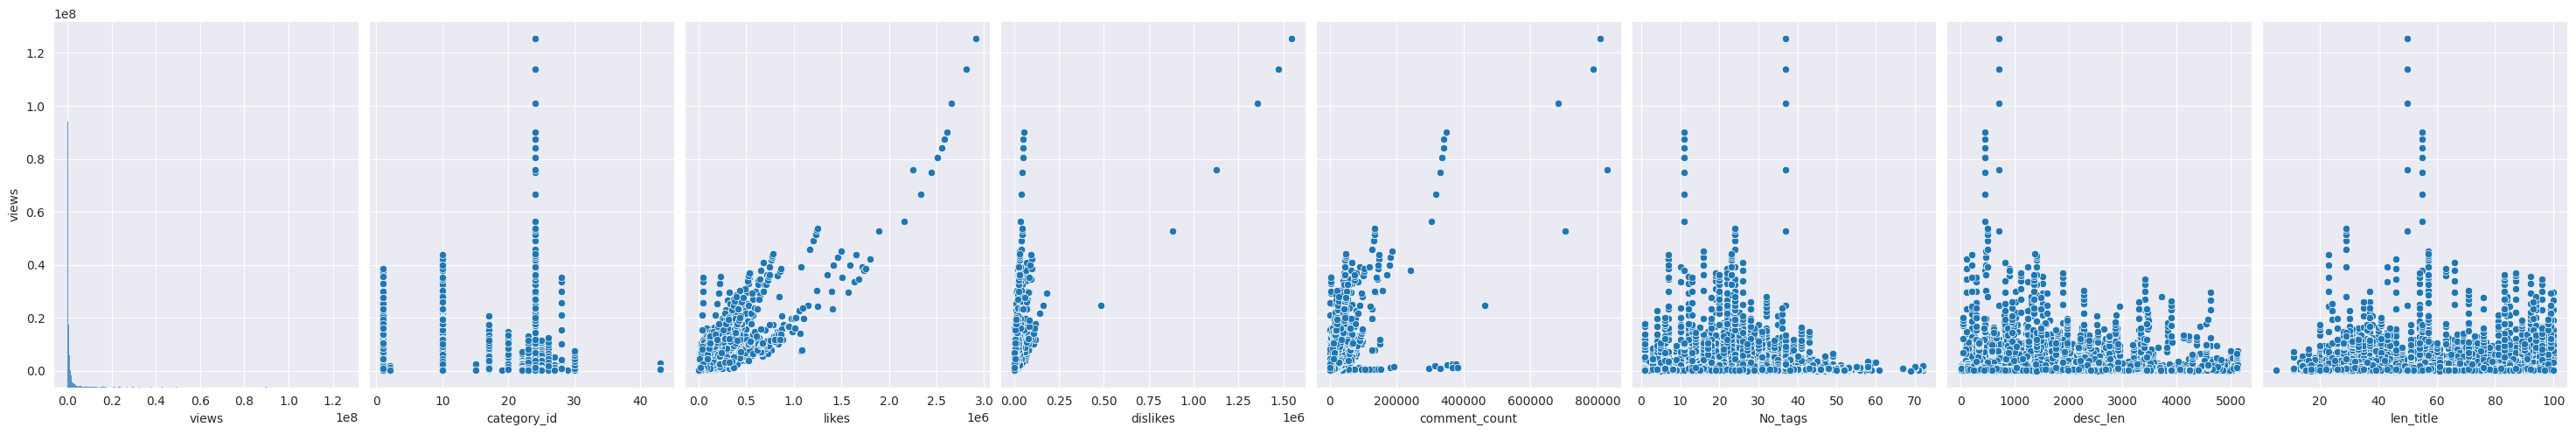

In [19]:
plt.figure(figsize=(15,15))
sns.pairplot(data=df, x_vars=['views','category_id','likes','dislikes','comment_count','No_tags','desc_len','len_title'], y_vars=['views'], height=5, aspect=0.75);
fig.tight_layout();

Dari pairplot yang diberikan, plot yang memiliki pola yang terbentuk adalah:

* category_id vs views
menunjukkan bahwa video yang berada dalam kategori tertentu cenderung memiliki lebih banyak views daripada video yang berada dalam kategori lain.
* likes vs views
menunjukkan bahwa video yang disukai cenderung memiliki lebih banyak views daripada video yang tidak disukai.
* dislikes vs views
menunjukkan bahwa orang-orang yang tidak menyukai video cenderung tidak menontonnya
* comments_count vs views
 menunjukkan bahwa video yang memiliki banyak komentar cenderung memiliki lebih banyak views daripada video yang tidak memiliki banyak komentar. Ini mungkin karena komentar dapat membantu orang menemukan video dan menarik perhatian mereka..
* ratings_disabled vs views
 video yang memiliki rating dinonaktifkan cenderung memiliki lebih sedikit views daripada video yang tidak memiliki rating dinonaktifkan. Ini mungkin karena orang-orang cenderung tidak menonton video yang tidak memiliki rating, karena mereka tidak tahu apakah video tersebut bagus atau tidak.

Summary :
* Pola yang terbentuk pada plot-plot ini tren kenaikan yang menunjukkan bahwa ada hubungan positif antara kedua variabel.
* Pola-pola ini menunjukkan bahwa ada sejumlah faktor yang dapat memengaruhi jumlah views yang diterima oleh video.

# Data Preparation

In [19]:
df_prep = df.copy()

### Handling Data Type

In [20]:
df_prep[timestamp] = df_prep[timestamp].apply(pd.to_datetime)

In [21]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  datetime64[ns]
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  datetime64[ns]
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

### Handling Missing Value

In [22]:
df_prep = df_prep.dropna()

In [39]:
df_prep.isna().sum()

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
No_tags                   0
desc_len                  0
len_title                 0
publish_date              0
dtype: int64

### Data Duplicate

In [23]:
df_prep = df_prep.drop_duplicates()

In [41]:
df_prep.duplicated().sum()

0

### Handling Outliers

### Log Transformation

In [24]:
for num in nums:
    df_prep[num] = np.log(df_prep[num] + 0.5)

In [43]:
df_prep[nums].describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,32518.000000,32518.000000,32518.000000,32518.000000,32518.000000,32518.000000,32518.000000,32518.000000
mean,2.983997,12.634625,7.978334,5.672157,5.589654,2.784651,6.427192,4.207491
std,0.626117,1.407669,2.333189,1.857737,2.298887,0.693296,0.961313,0.379132
min,0.405465,8.300156,-0.693147,-0.693147,-0.693147,0.405465,1.252763,1.704748
25%,3.157000,11.645840,6.685237,4.600158,4.310799,2.525729,5.901266,3.998201
50%,3.198673,12.535035,7.945378,5.685279,5.726846,2.970414,6.512488,4.324133
75%,3.198673,13.513708,9.419892,6.851449,7.082129,3.238678,7.108653,4.516339
max,3.772761,18.647276,14.884595,14.250546,13.626473,4.283587,8.544127,4.610158


#### Z-score

In [25]:
from scipy import stats

print("Before removing outlier: ", len(df_prep))

for num in nums:
    z_scores = np.abs(stats.zscore(df_prep[num]))
    df_prep = df_prep[z_scores <= 3]

print("After removing outlier: ", len(df_prep))

Before removing outlier:  32518
After removing outlier:  28723


In [58]:
df_prep[nums].describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,28723.000000,28723.000000,28723.000000,28723.000000,28723.000000,28723.000000,28723.000000,28723.000000
mean,0.802234,0.415989,0.564252,0.431733,0.440231,0.638182,0.717716,0.864324
std,0.081768,0.129600,0.123075,0.104483,0.151211,0.136393,0.123689,0.123823
min,0.577885,0.013785,0.164655,0.130216,0.000000,0.131720,0.335814,0.469230
25%,0.817135,0.324587,0.476703,0.358135,0.352204,0.566569,0.645197,0.789373
50%,0.829511,0.408072,0.554132,0.427284,0.447765,0.661390,0.724981,0.901554
75%,0.829511,0.499189,0.646344,0.503238,0.541498,0.730563,0.806013,0.967709
max,1.000000,0.817636,0.936559,0.748918,0.893960,1.000000,1.000000,1.000000


### Normalization & Standarization

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

for num in nums:
    df_prep[num] = MinMaxScaler().fit_transform(df_prep[num].values.reshape(len(df_prep), 1))

In [60]:
df_prep.describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,28723.000000,28723.000000,28723.000000,28723.000000,28723.000000,28723.000000,28723.000000,28723.000000
mean,0.531487,0.500346,0.517677,0.487338,0.492450,0.583293,0.574993,0.744378
std,0.193711,0.161225,0.159443,0.168874,0.169148,0.157084,0.186227,0.233290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.566789,0.386641,0.404257,0.368382,0.393982,0.500817,0.465809,0.603168
50%,0.596107,0.490497,0.504567,0.480146,0.500878,0.610022,0.585931,0.814523
75%,0.596107,0.603848,0.624027,0.602910,0.605730,0.689689,0.707933,0.939162
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Engineering

In [27]:
# copy df
df_fe = df_prep.copy()

In [62]:
df_fe.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,0.624252,2023-08-20 05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",0.582535,0.393259,0.600779,0.000000,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",0.610022,0.827941,0.649096,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,0.596107,2023-08-20 15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,0.556191,0.476928,0.458846,0.445307,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,0.522038,0.511618,0.649096,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,0.566789,2023-08-20 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",0.672072,0.772545,0.664114,0.670908,False,False,False,This video showcases the difference between pe...,0.624874,0.386706,0.226751,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,0.596107,2023-08-20 01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",0.553635,0.359905,0.479046,0.382024,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,0.453199,0.603661,0.917544,2017-11-13
5,2017-11-14,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,0.596107,2023-08-20 04:29:50,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",0.863488,0.800626,0.766478,0.715707,False,False,False,Watch MCA- Middle Class Abbayi First Look Teas...,0.652519,0.496990,0.939162,2017-11-10


## Lable Encoding

In [28]:
mapping_TrueFalse = {
    False: 0,
    True: 1
}
df_fe['comments_disabled'] = df_fe['comments_disabled'].map(mapping_TrueFalse)
df_fe['ratings_disabled'] = df_fe['ratings_disabled'].map(mapping_TrueFalse)
df_fe['video_error_or_removed'] = df_fe['video_error_or_removed'].map(mapping_TrueFalse)
df_fe.sample()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
10529,2018-01-12,Tu Raja Ki Raj Dulari Feat. Abhi Payla II Naza...,Nazar Battu Productions,0.566789,2023-08-22 12:14:40,"nazar battu|""raja ki rajdulari""|""kareja""|""hunn...",0.601166,0.769424,0.677086,0.726675,0,0,0,Download U -Dictionary from here https://goo.g...,0.594388,0.739184,0.614958,2018-01-10


## One Hot Encoding

In [29]:
# create new column publish_hour from publish_time
df_fe['publish_hour'] = pd.to_datetime(df_fe['publish_time']).dt.round('H').dt.strftime('%H').astype(int)

In [65]:
df_fe.sample()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date,publish_hour
25310,2018-04-06,Jabardasth Mahesh Gets Emotional @ Rangasthala...,NTV Telugu,0.624252,2023-08-20 07:59:04,"rangasthalam thank you meet|""rangasthalam than...",0.559073,0.537965,0.396245,0.418076,0,0,0,Jabardasth Mahesh Gets Emotional @ Rangasthala...,0.560411,0.562559,0.966908,2018-04-02,8


In [30]:
# create days from publish date
to_one_hot = df_fe.publish_date.dt.day_name()
one_hot = pd.get_dummies(to_one_hot)
df_fe = df_fe.join(one_hot)
df_fe.sample()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,len_title,publish_date,publish_hour,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
14101,2018-01-31,Nenjam Marappathillai - 29th January to 2nd Fe...,Vijay Television,0.596107,2023-08-22 07:03:27,"Star|""Star Vijay TV""|""Vijay TV""|""Vijay""|""Redef...",0.509517,0.391082,0.381859,0.362055,...,0.732213,2018-01-29,7,0,1,0,0,0,0,0


In [32]:
df_fe['is_weekend'] = df_fe.apply(lambda x : 1 if (x['Saturday']) or (x['Sunday']) == 1 else 0, axis = 1)

## Drop Outdated Columns

In [35]:
df_fe.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'No_tags', 'desc_len', 'len_title', 'publish_date',
       'publish_hour', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'is_weekend'],
      dtype='object')

In [36]:
df_fe = df_fe.drop(columns=['trending_date', 'title', 'channel_title',
       'publish_time', 'tags', 'description', 'publish_date'])

In [37]:
df_fe.head()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title,publish_hour,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,is_weekend
1,0.624252,0.582535,0.393259,0.600779,0.000000,1,0,0,0.610022,0.827941,0.649096,6,0,1,0,0,0,0,0,0
2,0.596107,0.556191,0.476928,0.458846,0.445307,0,0,0,0.522038,0.511618,0.649096,16,0,0,0,1,0,0,0,1
3,0.566789,0.672072,0.772545,0.664114,0.670908,0,0,0,0.624874,0.386706,0.226751,7,0,0,0,1,0,0,0,1
4,0.596107,0.553635,0.359905,0.479046,0.382024,0,0,0,0.453199,0.603661,0.917544,1,0,1,0,0,0,0,0,0
5,0.596107,0.863488,0.800626,0.766478,0.715707,0,0,0,0.652519,0.496990,0.939162,4,1,0,0,0,0,0,0,0


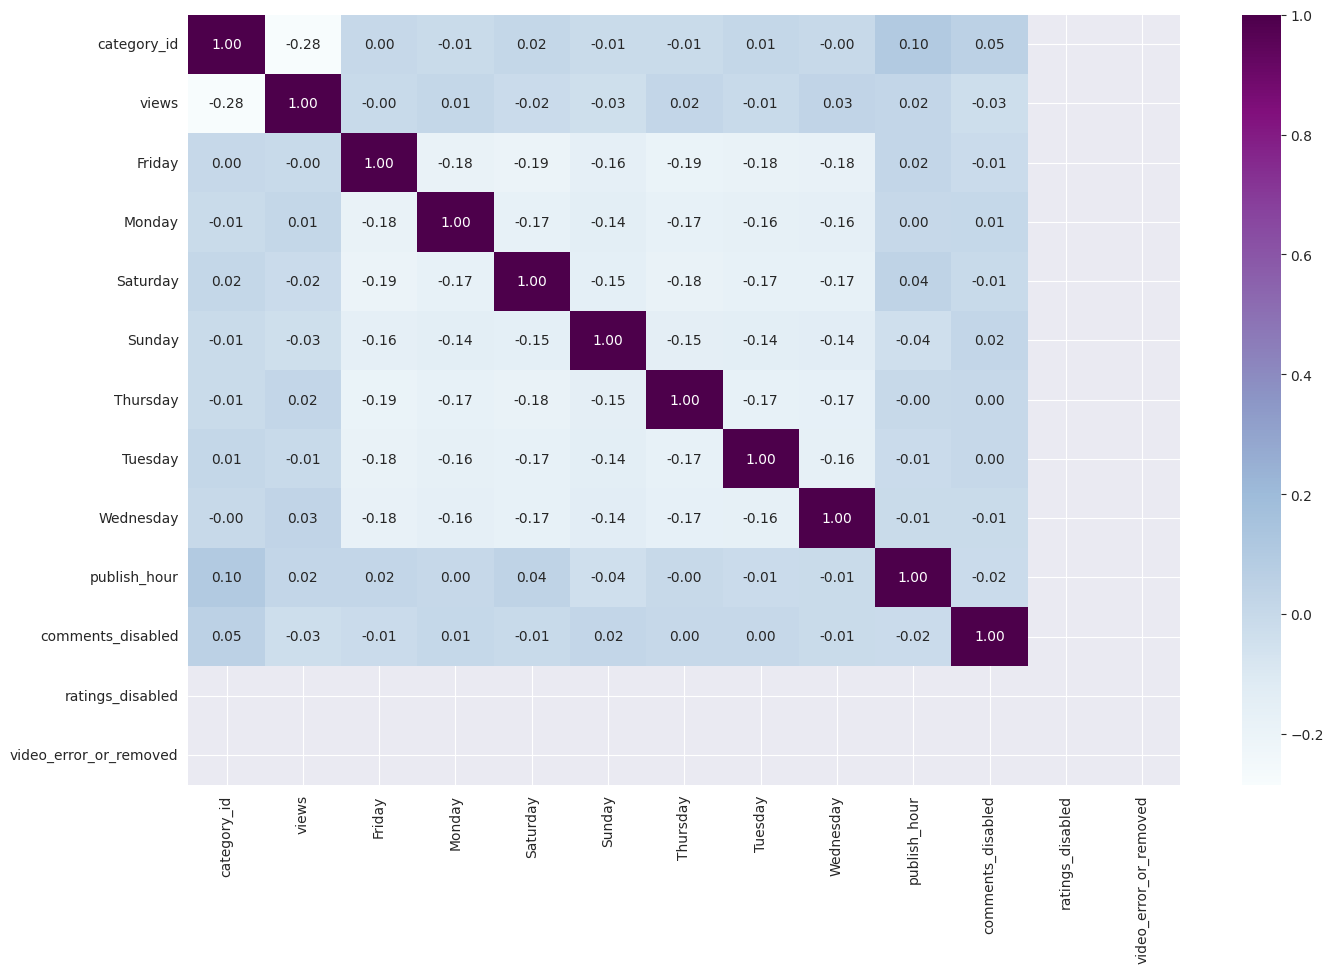

In [70]:
features = ['category_id','views', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'publish_hour', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']
corr_= df_fe[features].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu");

kolom rating_disabled dan video_error_or_removed hanya berisi 'False' stelah di hapus outlier menggunakan z-score

<Figure size 1500x1500 with 0 Axes>

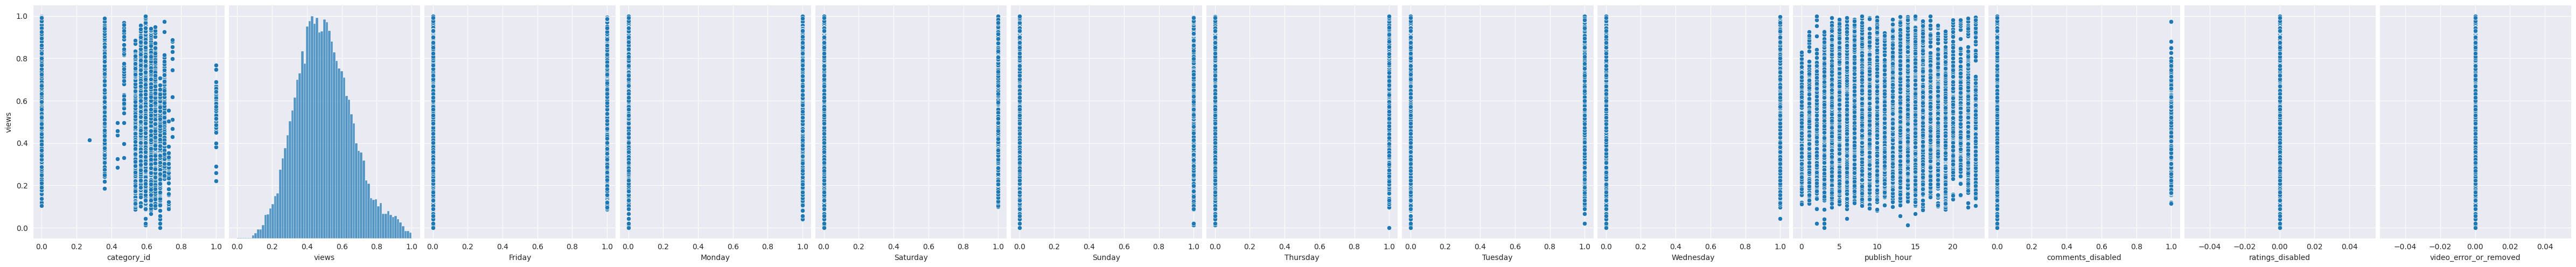

In [71]:
plt.figure(figsize=(15,15))
sns.pairplot(data=df_fe, x_vars=features, y_vars=['views'], height=5, aspect=0.75);
fig.tight_layout();

In [51]:
X = df_fe.drop(columns = [i for i in df_fe.columns if i in ['trending_date', 'title', 'channel_title', 'publish_time',\
                                                            'tags', 'views', 'publish_date', 'description', 'Friday',\
                                                            'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',\
                                                            'Wednesday']])
y = df_fe[['views']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [56]:
X.columns

Index(['category_id', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'No_tags', 'desc_len', 'len_title', 'publish_hour', 'is_weekend'],
      dtype='object')

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

def eval_regression():
    dict_model = {'Linear Regression' : LinearRegression(),
                 'Ridge Regression' : Ridge(random_state = 1),
                 'Lasso Regression' : Lasso(random_state = 1),
                 'ElasticNet Regression' : ElasticNet(random_state = 1),
                 'Decision Tree Regression' : DecisionTreeRegressor(random_state = 1),
                 'Random Forest Regression' : RandomForestRegressor(random_state = 1),
                 'XGBoost Regression' : XGBRegressor(random_state = 1)}
    
    for key, val in dict_model.items():
        model = val
        model.fit(X_train, y_train)
    
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)

        print(key, "Evaluation Result")
        print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
        print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))

        print('R2 (test): ' + str(r2_score(y_test, y_pred)))
        print('R2 (train): ' + str(r2_score(y_train, y_pred_train)))

        # k-fold cross validation
        score = cross_validate(model, X, y, cv=5, scoring='r2', return_train_score=True)
        print('R2 (cross-val test): ' + str(score['test_score'].mean()))
        print('R2 (cross-val train): ' + str(score['train_score'].mean()))
        print("")

In [55]:
eval_regression()

Linear Regression Evaluation Result
RMSE (test): 0.07320185767703326
RMSE (train): 0.07385742000560337
R2 (test): 0.7946081961338263
R2 (train): 0.7897878418407493
R2 (cross-val test): 0.7835151883601068
R2 (cross-val train): 0.7910511129648219

Ridge Regression Evaluation Result
RMSE (test): 0.07319470381186825
RMSE (train): 0.07386031663126434
R2 (test): 0.7946483391990286
R2 (train): 0.7897713528306562
R2 (cross-val test): 0.7835325646054128
R2 (cross-val train): 0.7910384288086947

Lasso Regression Evaluation Result
RMSE (test): 0.16153575968254075
RMSE (train): 0.1610887521341872
R2 (test): -0.00017561303088653446
R2 (train): 0.0
R2 (cross-val test): -0.04488001328822566
R2 (cross-val train): 0.0

ElasticNet Regression Evaluation Result
RMSE (test): 0.16153575968254075
RMSE (train): 0.1610887521341872
R2 (test): -0.00017561303088653446
R2 (train): 0.0
R2 (cross-val test): -0.04488001328822566
R2 (cross-val train): 0.0

Decision Tree Regression Evaluation Result
RMSE (test): 0.0751

In [62]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['squared_error', 'friedman_mse']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
    
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rs = RandomizedSearchCV(RandomForestRegressor(random_state=1), hyperparameters, scoring='r2', cv=5)
rs.fit(X_train, y_train)

y_pred = rs.predict(X_test)
y_pred_train = rs.predict(X_train)

print("Random Forest Hyperparameter Tuning Evaluation Result ")
print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))

print('R2 (test): ' + str(r2_score(y_test, y_pred)))
print('R2 (train): ' + str(r2_score(y_train, y_pred_train)))

Random Forest Hyperparameter Tuning Evaluation Result 
RMSE (test): 0.053362220223637194
RMSE (train): 0.033690213075423324
R2 (test): 0.8908542861064848
R2 (train): 0.9562601709999715


Model Akhir yang kelompok kami putuskan adalah Random Forest Regressor dengan value dari RMSE (test): 0.05143, RMSE (train): 0.0197, R2 (test): 0.8986, R2 (train): 0.9849 dimana menunjukkan performa yang paling optimal diantara model lain yang telah kami lakukan traing dan ada sedikit kecenderungan menuju overfitting yang akan dilakukan hyperparameter tuning kemudian. Metrics RMSE yang diperoleh menyatakan bahwa akar rata-rata kuadrat jarak antara data prediksi dengan data point sangat kecil sehingga model dapat memberikan prediksi yang hampir serupa dengan actual data. R2 hasil evaluasi menggambarkan model mampu menggunakan variable yang dimiliki untuk memberikan prediksi yang lebih baik dibandingkan menggunakan rata-rata actual target data. Hyperparameter Tuning yang kami terapkan adalah n_estimators(jumlah tree), criterion(metode pengukuran split), max_depth(kedalaman tree), min_samples_split(minimum sample untuk split pada node), dan min_samples_leaf serta menggunakan algoritma RandomizedSearchCV untuk menemukan komnbinasi hyperparameter secara acak pada model dimana diperoleh nilai RMSE pada data testing sedikit membaik begitupula score R2 yang cukup seimbang R2 (test): 0.8908 dan R2 (train): 0.9562 sehingga model tidak mengalami overfit dan telah pada kondisi optimal.